## Loan Prediction and Analysis

#### Objective:

#### LOANS are the major requirement of the modern world. By this only, Banks get a major part of the total profit. It is beneficial for students to manage their education and living expenses, and for people to buy any kind of luxury like houses, cars, etc.But when it comes to deciding whether the applicant’s profile is relevant to be granted with loan or not. Banks have to look after many aspects.So, here we will be using Machine Learning with Python to ease their work and predict whether the candidate’s profile is relevant or not using key features like Marital Status, Education, Applicant Income, Credit History.

#### Attributes Information

#### Variable-	Description
#### Loan_ID	-Unique Loan ID
#### Gender-	Male/ Female
#### Married	-Applicant married (Y/N)
#### Dependents- Number of dependents
#### Education-	Applicant Education (Graduate/ Under Graduate)
#### Self_Employed-	Self employed (Y/N)
#### ApplicantIncome-	Applicant income
#### CoapplicantIncome-	Coapplicant income
#### LoanAmount-	Loan amount in thousands
#### Loan_Amount_Term-	Term of loan in months
#### Credit_History-	credit history meets guidelines
#### Property_Area-	Urban/ Semi Urban/ Rural
#### Loan_Status	-Loan approved (Y/N)

#### Importing important libraries

In [97]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

#### Loading the dataset

In [98]:
df=pd.read_csv("Loan_prediction_Analysis.csv")

In [99]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [48]:
df.shape

(614, 13)

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [50]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


#### Data Preprocessing

In [51]:
# checking for null values
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [100]:
# Replacing numerical columns null values with its mean.
df['LoanAmount']=df['LoanAmount'].fillna(df['LoanAmount'].mean())
df['Loan_Amount_Term']=df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mean())
df['Credit_History']=df['Credit_History'].fillna(df['Credit_History'].mean())

In [101]:
# Replacing categorical columns null values with its mode.
df['Gender']=df['Gender'].fillna(df['Gender'].mode()[0])
df['Married']=df['Married'].fillna(df['Married'].mode()[0])
df['Dependents']=df['Dependents'].fillna(df['Dependents'].mode()[0])
df['Self_Employed']=df['Self_Employed'].fillna(df['Self_Employed'].mode()[0])

In [102]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

#### Exploratory Data Analysis

In [12]:
## Data Visualization for categorical variables

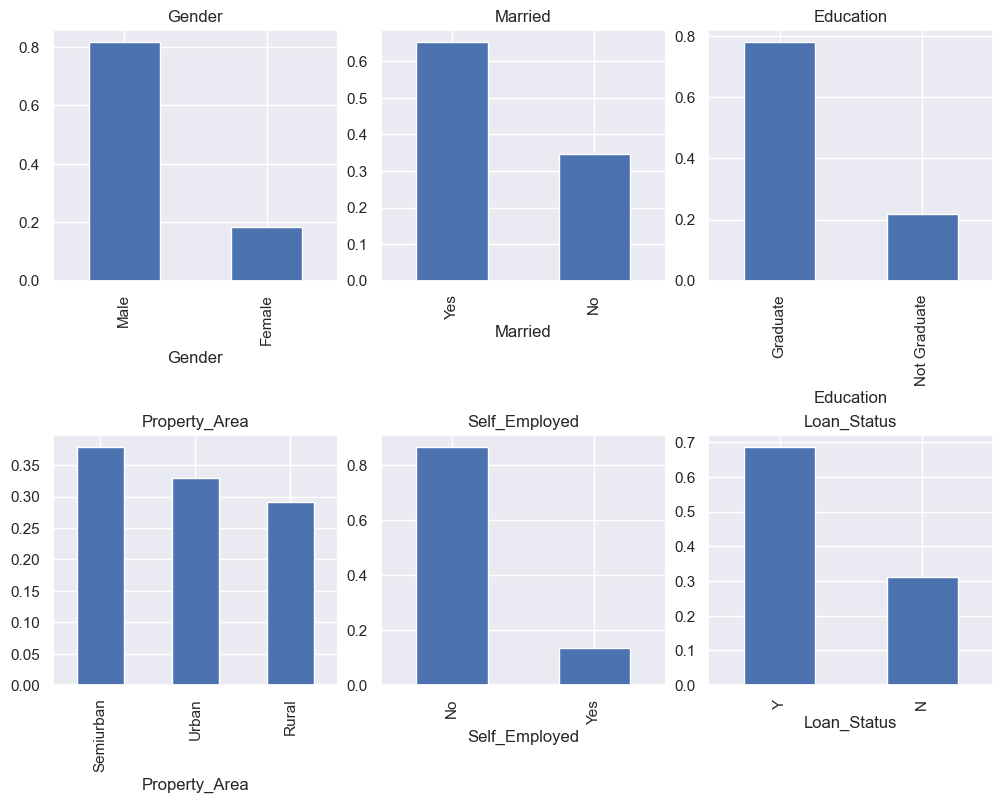

In [103]:
plt.subplot(231)
df.Gender.value_counts(normalize=True).plot(kind = 'bar', title = "Gender",figsize=(10,8))
plt.tight_layout(pad=0.5)

plt.subplot(232)
df.Married.value_counts(normalize=True).plot(kind = 'bar', title = "Married")
plt.tight_layout(pad=0.5)

plt.subplot(233)
df.Education.value_counts(normalize=True).plot(kind = 'bar', title = "Education")
plt.tight_layout(pad=0.5)

plt.subplot(234)
df.Property_Area.value_counts(normalize=True).plot(kind = 'bar',title = "Property_Area")
plt.tight_layout(pad=0.5)

plt.subplot(235)
df.Self_Employed.value_counts(normalize=True).plot(kind = 'bar',title = "Self_Employed")
plt.tight_layout(pad=0.5)

plt.subplot(236)
df.Loan_Status.value_counts(normalize=True).plot(kind = 'bar',title = "Loan_Status")
plt.tight_layout(pad=0.5)


#### Conclusion:
80% of loan applicants are from male in the training dataset.
Nearly 70% are married
About 75% of loan applicants are graduates
Highest number of applicants are from Semiurban areas, followed by urban areas.
Nearly 85-90% loan applicants are self employed
Loan has been approved for more than 65% of applicants.

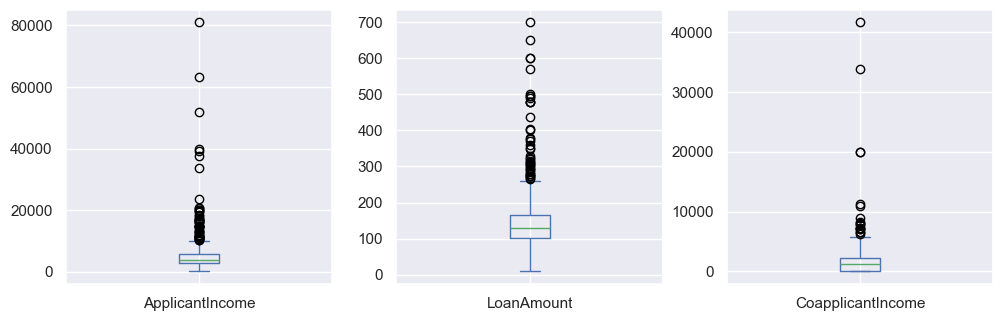

In [104]:
#bins = np.linspace(Train.ApplicantIncome.min(),Train.ApplicantIncome.max(),10)
plt.subplot(231)
df['ApplicantIncome'].plot.box(figsize=(10,6))
plt.tight_layout(pad=0.5)

plt.subplot(232)
df['LoanAmount'].plot.box()
plt.tight_layout(pad=0.5)

plt.subplot(233)
df['CoapplicantIncome'].plot.box()
plt.tight_layout(pad=0.5)

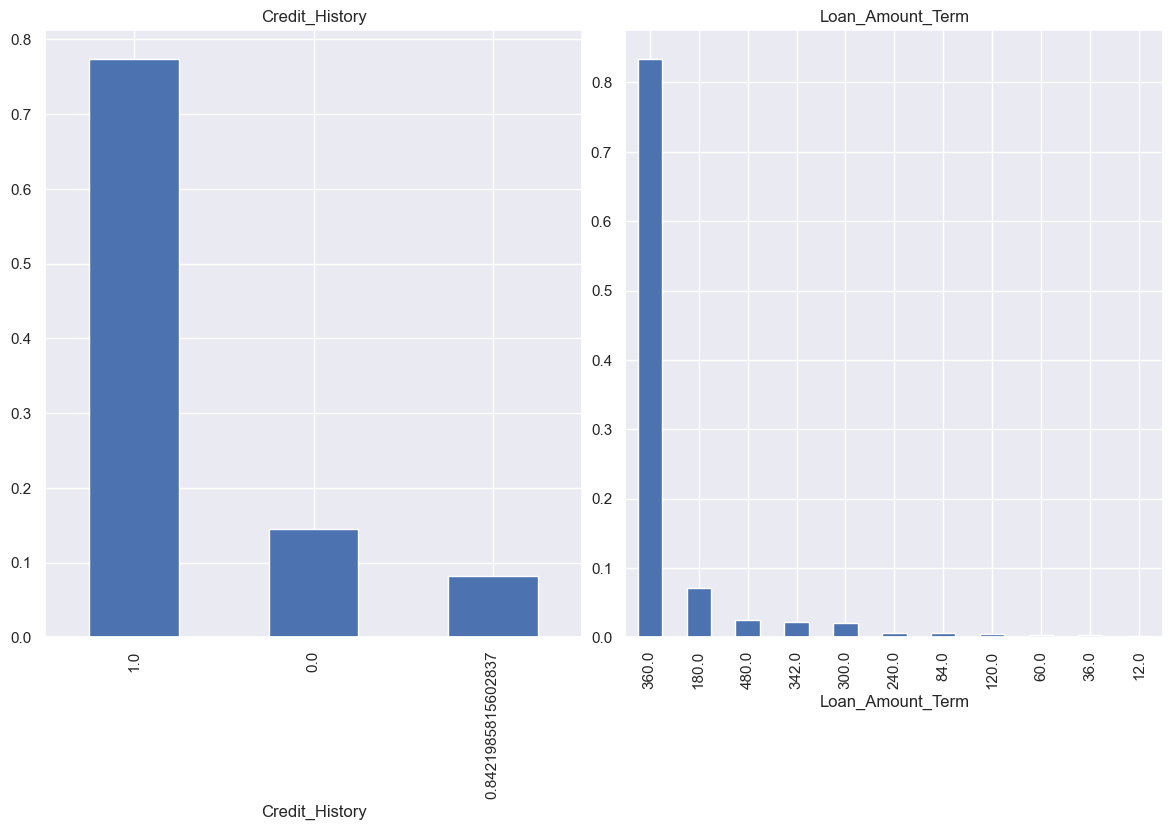

In [106]:
plt.subplot(121)
df.Credit_History.value_counts(normalize = 'True').plot(kind = 'bar', title='Credit_History')
plt.tight_layout(pad=0.5)

plt.subplot(122)
df.Loan_Amount_Term.value_counts(normalize = 'True').plot(kind = 'bar', title='Loan_Amount_Term')
plt.tight_layout(pad=0.5)

#### Conclusion:
80% of applicants have credit history of 1
More than 80% of loans are taken for 360 days or above.
The applicantIncome is mostly between 10000-40000 with some outliers.
CoapplicantIncome is lesser than applicantIncome and is within the 5000-15000, with some outliers.
Loan Amount is mostly concentrated between 300-500.
We might have to remove outliers from applicantIncome and CoapplicantIncome. But for that we need to find reasons for outliers

<Axes: xlabel='Property_Area', ylabel='count'>

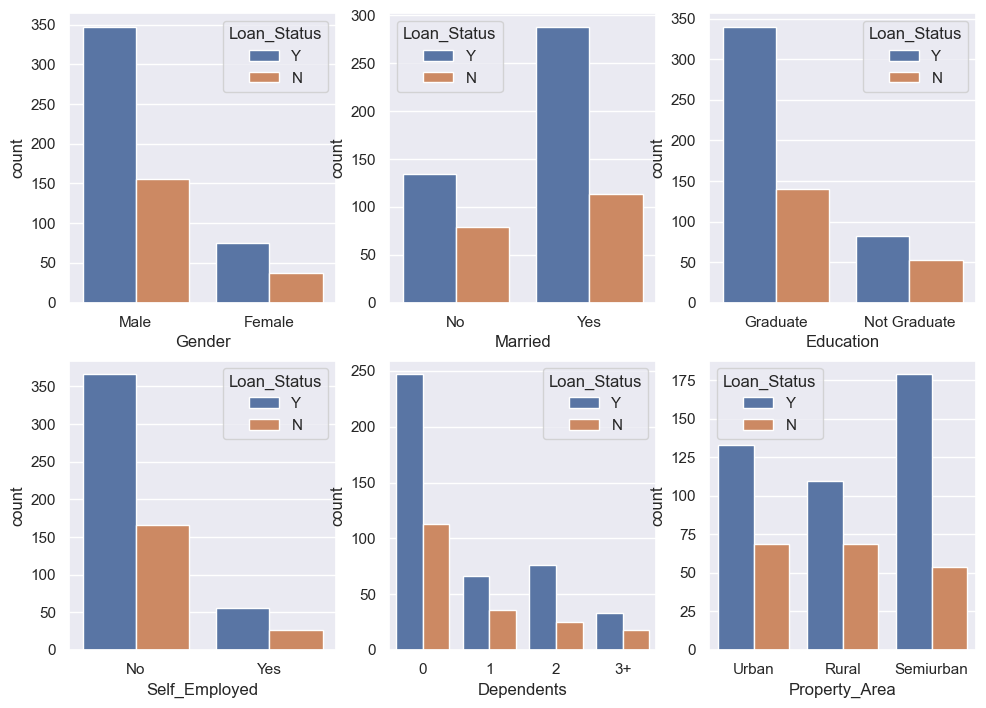

In [107]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
plt.subplot(231)
sns.countplot(x="Gender", hue='Loan_Status', data=df)
plt.subplot(232)
sns.countplot(x="Married", hue='Loan_Status', data=df)
plt.subplot(233)
sns.countplot(x="Education", hue='Loan_Status', data=df)
plt.subplot(234)
sns.countplot(x="Self_Employed", hue='Loan_Status', data=df)
plt.subplot(235)
sns.countplot(x="Dependents", hue='Loan_Status', data=df)
plt.subplot(236)
sns.countplot(x="Property_Area", hue='Loan_Status', data=df)

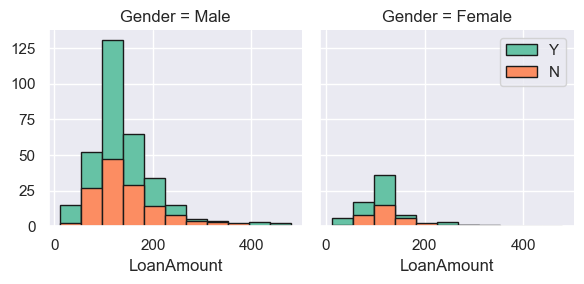

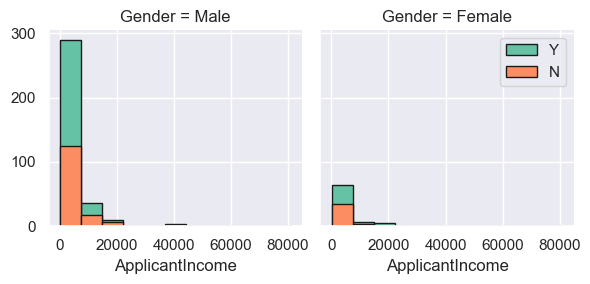

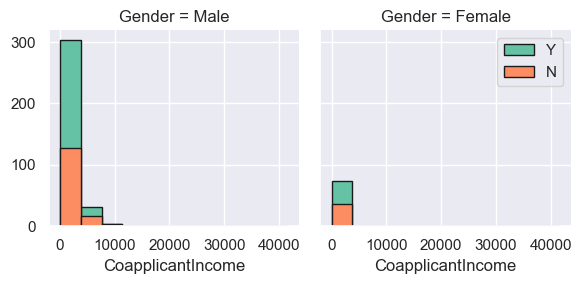

In [12]:
bins = np.linspace(df.Loan_Amount_Term.min(), df.Loan_Amount_Term.max(),12)
graph = sns.FacetGrid(df, col="Gender", hue="Loan_Status", palette="Set2", col_wrap=2)
graph.map(plt.hist, 'LoanAmount', bins=bins, ec="k")
graph.axes[-1].legend()
plt.show()

bins = np.linspace(df.ApplicantIncome.min(), df.ApplicantIncome.max(),12)
graph = sns.FacetGrid(df, col="Gender", hue="Loan_Status", palette="Set2", col_wrap=2)
graph.map(plt.hist, 'ApplicantIncome', bins=bins, ec="k")
graph.axes[-1].legend()
plt.show()

bins = np.linspace(df.CoapplicantIncome.min(), df.CoapplicantIncome.max(),12)
graph = sns.FacetGrid(df, col="Gender", hue="Loan_Status", palette="Set2", col_wrap=2)
graph.map(plt.hist, 'CoapplicantIncome', bins=bins, ec="k")
graph.axes[-1].legend()
plt.show()

In [64]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y


<Axes: xlabel='ApplicantIncome', ylabel='Density'>

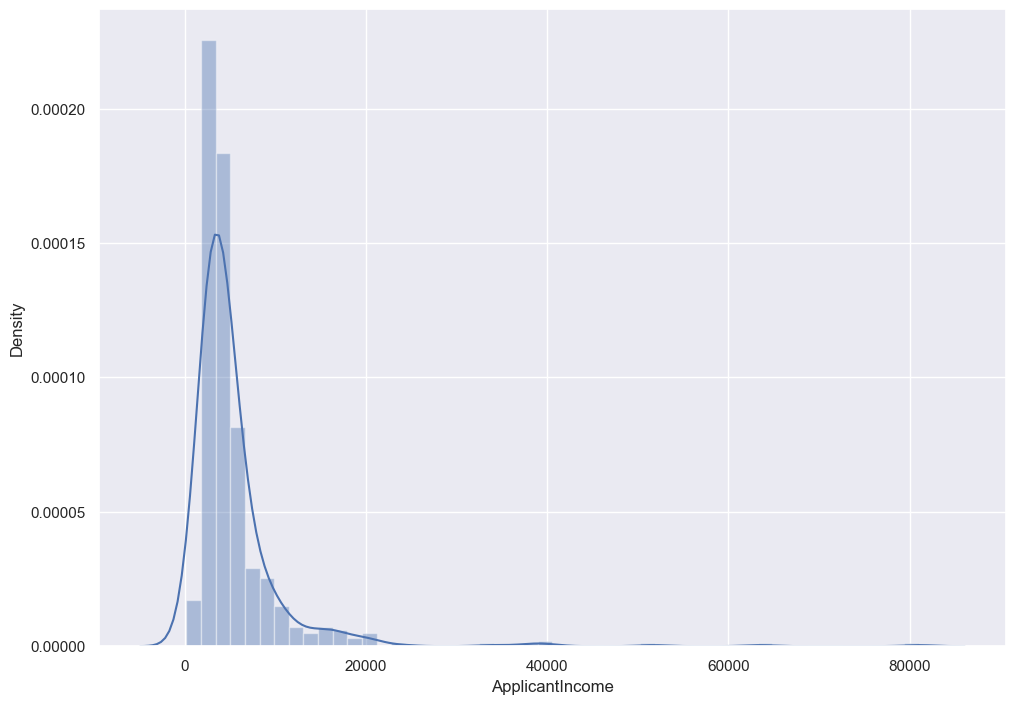

In [108]:
sns.distplot(df['ApplicantIncome'])

<Axes: xlabel='CoapplicantIncome', ylabel='Density'>

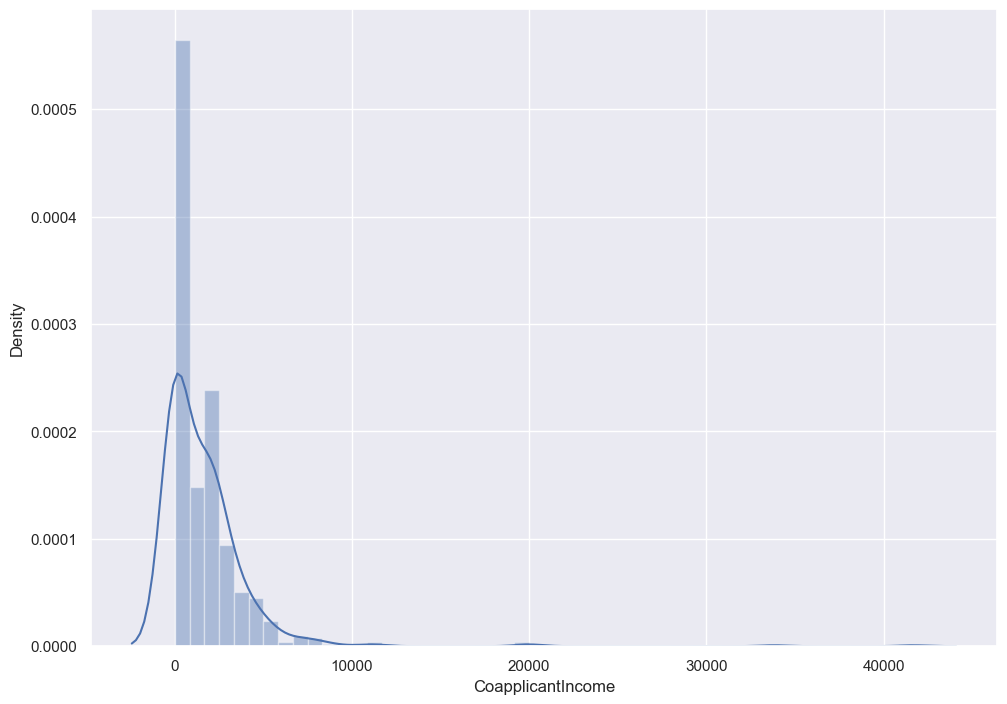

In [66]:
sns.distplot(df['CoapplicantIncome'])

<Axes: xlabel='LoanAmount', ylabel='Density'>

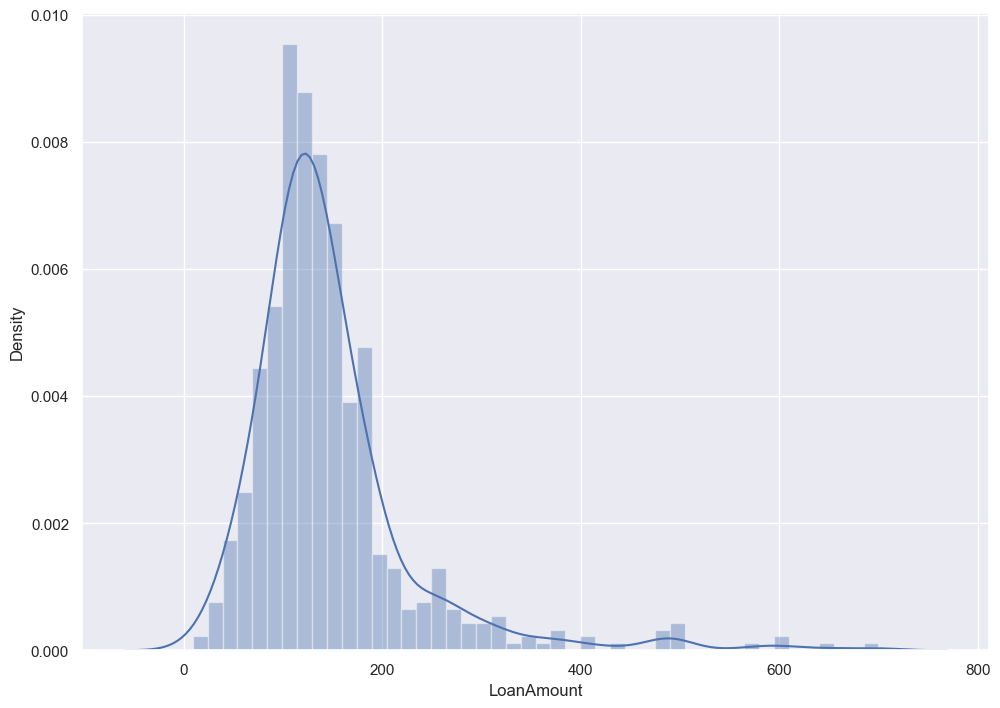

In [67]:
sns.distplot(df['LoanAmount'])

<Axes: xlabel='Loan_Amount_Term', ylabel='Density'>

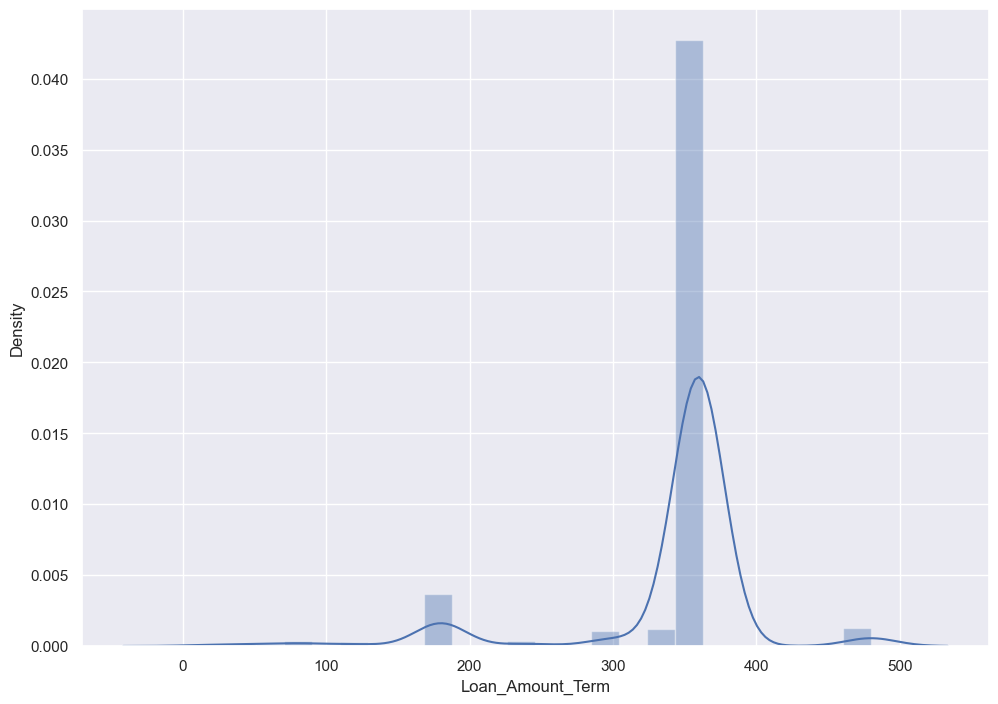

In [68]:
sns.distplot(df['Loan_Amount_Term'])

<Axes: xlabel='Credit_History', ylabel='Density'>

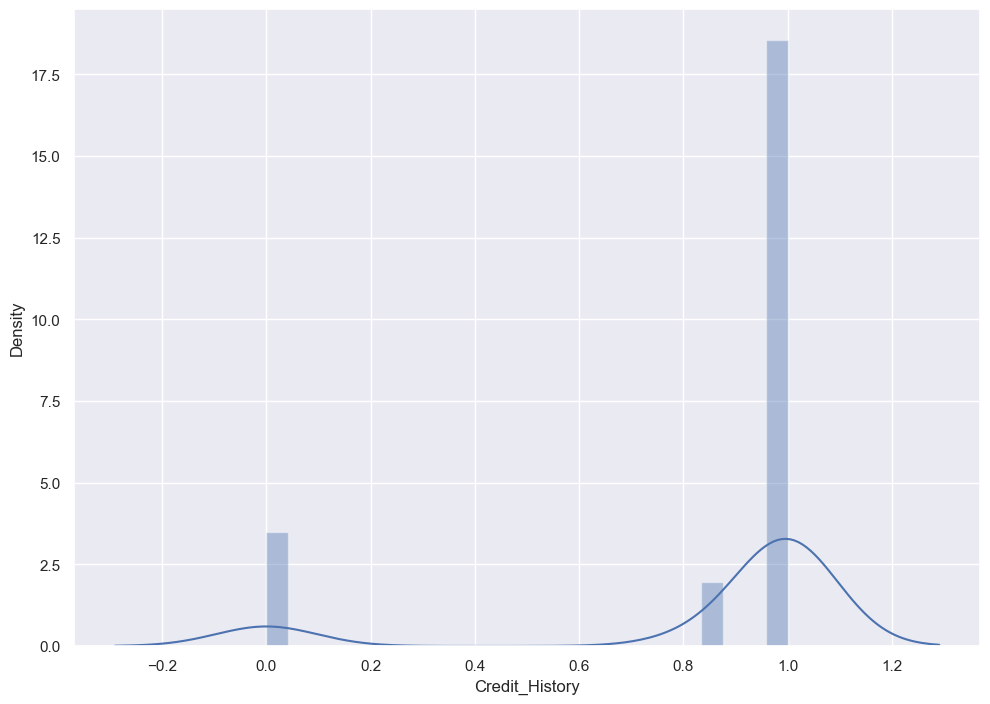

In [69]:
sns.distplot(df['Credit_History'])

#### Here we can note that except credit history all numerical attributes are left skewed which shows that our data needs to be normalized,so for the normalization we perform log transformation on numerical attributes.

In [70]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y


## Log Transformation of numerical variables

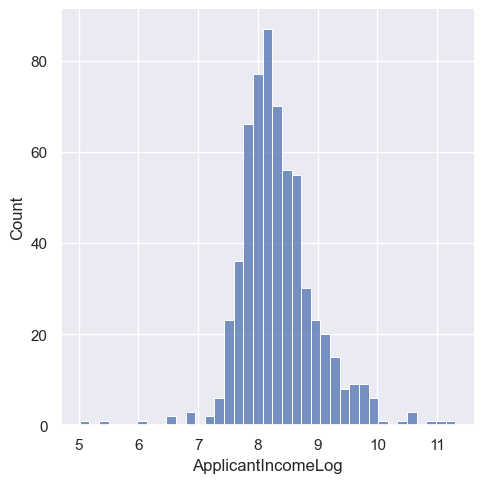

In [71]:
df['ApplicantIncomeLog']=np.log(df['ApplicantIncome']+1)
sns.displot(df['ApplicantIncomeLog'])

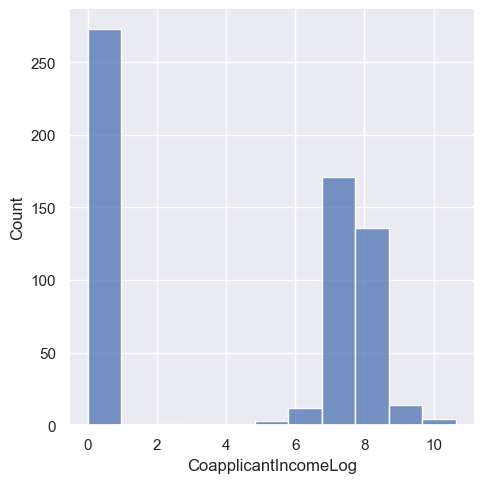

In [72]:
df['CoapplicantIncomeLog']=np.log(df['CoapplicantIncome']+1)
sns.displot(df['CoapplicantIncomeLog'])

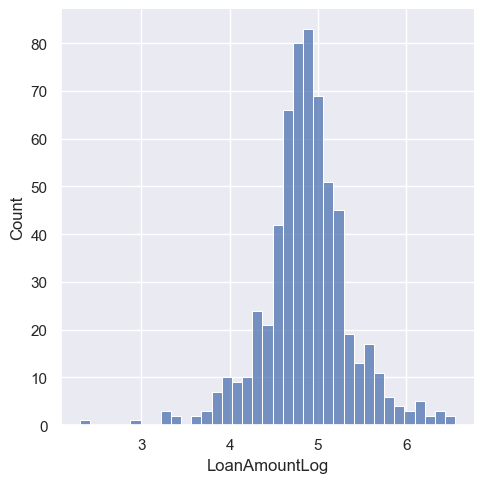

In [73]:
df['LoanAmountLog']=np.log(df['LoanAmount']+1)
sns.displot(df['LoanAmountLog'])

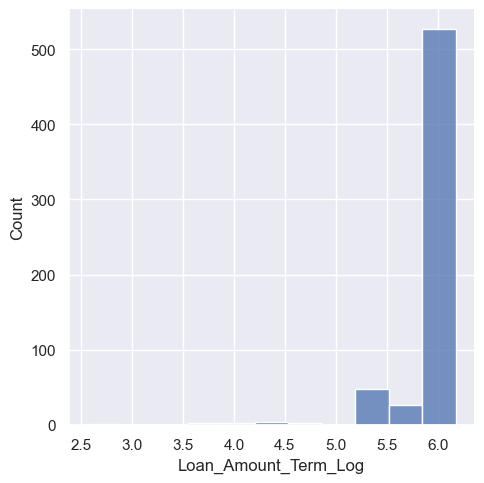

In [74]:
df['Loan_Amount_Term_Log']=np.log(df['Loan_Amount_Term']+1)
sns.displot(df['Loan_Amount_Term_Log'])

#### Now from above all log transformations we can notice that data is normalize at it is right skewed so we can proceed further

In [75]:
# we can integrate applicants income and coapplicants income to total income
df['Total_Income'] = df['ApplicantIncome'] + df['CoapplicantIncome']
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,ApplicantIncomeLog,CoapplicantIncomeLog,LoanAmountLog,Loan_Amount_Term_Log,Total_Income
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y,8.674197,0.000000,4.993232,5.888878,5849.0
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N,8.430327,7.319202,4.859812,5.888878,6091.0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y,8.006701,0.000000,4.204693,5.888878,3000.0
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y,7.857094,7.765993,4.795791,5.888878,4941.0
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y,8.699681,0.000000,4.955827,5.888878,6000.0


#### Out of all the classifiers, Logistic Regression shows a better result in terms of cross-validation. Now let's try to change some hyperparameters to improve the accuracy. 

Non-numeric columns: Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'Property_Area', 'Loan_Status'],
      dtype='object')


<Axes: >

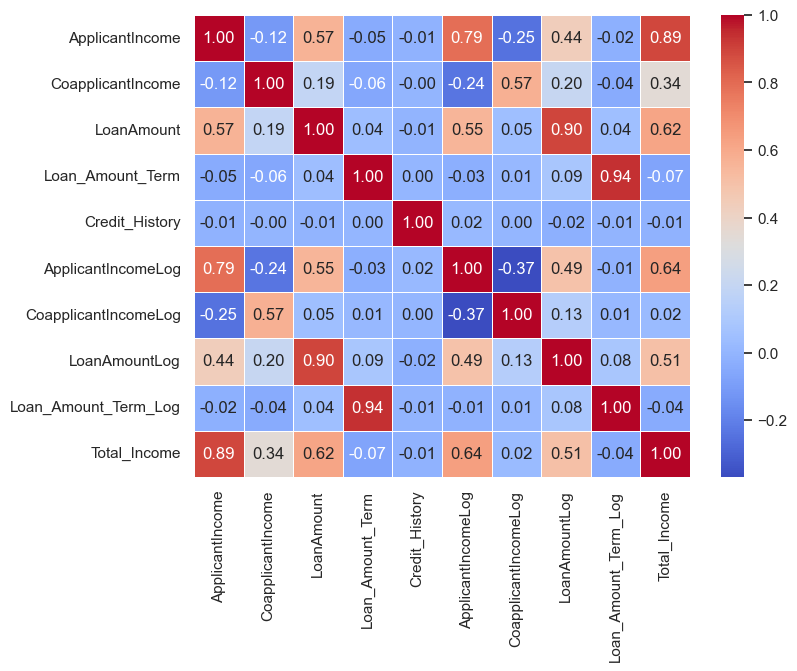

In [76]:
#Finding correlation

non_numeric_columns = df.select_dtypes(exclude=['float64', 'int64']).columns
print("Non-numeric columns:", non_numeric_columns)

numeric_df = df.drop(columns=non_numeric_columns, errors='ignore')
numeric_df = numeric_df.apply(pd.to_numeric, errors='ignore')

correlation_matrix = numeric_df.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5) 


#### We need to remove the highly correlated attributes. It means the original attributes are correlated with log attributes.We will remove the previous attributes and keep the log attributes to train our model.

In [77]:
# drop unnecessary columns
cols = ['ApplicantIncome', 'CoapplicantIncome', "LoanAmount", "Loan_Amount_Term", "Total_Income", 'Loan_ID', 'CoapplicantIncomeLog']
df = df.drop(columns=cols, axis=1)
df.head()

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_Status,ApplicantIncomeLog,LoanAmountLog,Loan_Amount_Term_Log
0,Male,No,0,Graduate,No,1.0,Urban,Y,8.674197,4.993232,5.888878
1,Male,Yes,1,Graduate,No,1.0,Rural,N,8.430327,4.859812,5.888878
2,Male,Yes,0,Graduate,Yes,1.0,Urban,Y,8.006701,4.204693,5.888878
3,Male,Yes,0,Not Graduate,No,1.0,Urban,Y,7.857094,4.795791,5.888878
4,Male,No,0,Graduate,No,1.0,Urban,Y,8.699681,4.955827,5.888878


In [38]:
## Label Encoding
## We will use label encoding to convert the categorical column into the numerical column

In [78]:
from sklearn.preprocessing import LabelEncoder

cols = ['Gender', "Married", "Education", 'Self_Employed', "Property_Area", "Loan_Status", "Dependents"]
le = LabelEncoder()
for col in cols:
    df[col] = le.fit_transform(df[col])

In [79]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_Status,ApplicantIncomeLog,LoanAmountLog,Loan_Amount_Term_Log
0,1,0,0,0,0,1.0,2,1,8.674197,4.993232,5.888878
1,1,1,1,0,0,1.0,0,0,8.430327,4.859812,5.888878
2,1,1,0,0,1,1.0,2,1,8.006701,4.204693,5.888878
3,1,1,0,1,0,1.0,2,1,7.857094,4.795791,5.888878
4,1,0,0,0,0,1.0,2,1,8.699681,4.955827,5.888878


#### Splitting the data for Training and Testing

In [80]:
# specify input and output attributes
X = df.drop(columns=['Loan_Status'], axis=1)
y = df['Loan_Status']

In [28]:
print(X)

      Loan_ID  Gender Married Dependents     Education Self_Employed  \
0    LP001002    Male      No          0      Graduate            No   
1    LP001003    Male     Yes          1      Graduate            No   
2    LP001005    Male     Yes          0      Graduate           Yes   
3    LP001006    Male     Yes          0  Not Graduate            No   
4    LP001008    Male      No          0      Graduate            No   
..        ...     ...     ...        ...           ...           ...   
609  LP002978  Female      No          0      Graduate            No   
610  LP002979    Male     Yes         3+      Graduate            No   
611  LP002983    Male     Yes          1      Graduate            No   
612  LP002984    Male     Yes          2      Graduate            No   
613  LP002990  Female      No          0      Graduate           Yes   

     ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0               5849                0.0         NaN           

In [81]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

#### Model Training

In [82]:
# classify function
from sklearn.model_selection import cross_val_score
def classify(model, x, y):
    x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
    model.fit(x_train, y_train)
    print("Accuracy is", model.score(x_test, y_test)*100)
    # cross validation - it is used for better validation of model
    # eg: cv-5, train-4, test-1
    score = cross_val_score(model, x, y, cv=5)
    print("Cross validation is",np.mean(score)*100)

#### Logistic Regression:

In [83]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
classify(model, X, y)


Accuracy is 77.27272727272727
Cross validation is 81.10888977742236


#### Decision Tree:

In [84]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
classify(model, X, y)

Accuracy is 73.37662337662337
Cross validation is 71.01426096228177


#### Random Forest

In [85]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
classify(model, X, y)

Accuracy is 79.22077922077922
Cross validation is 77.85285885645742


#### Out of all the classifiers, Logistic Regression shows a better result in terms of cross-validation. Now let's try to change some hyperparameters to improve the accuracy. 

#### Hyperparameter Tuning

In [87]:
model = RandomForestClassifier(n_estimators=100, min_samples_split=25, max_depth=7, max_features=1)
classify(model, X, y)

Accuracy is 77.27272727272727
Cross validation is 80.78368652538984


## Confusion Matrix

In [89]:
model = RandomForestClassifier(n_estimators=100, min_samples_split=25, max_depth=7, max_features=1)
classify(model, X, y)

Accuracy is 76.62337662337663
Cross validation is 80.61975209916034


In [90]:
from sklearn.metrics import confusion_matrix
y_pred = model.predict(x_test)
cm = confusion_matrix(y_test, y_pred)
cm

array([[20, 34],
       [ 2, 98]], dtype=int64)

<Axes: >

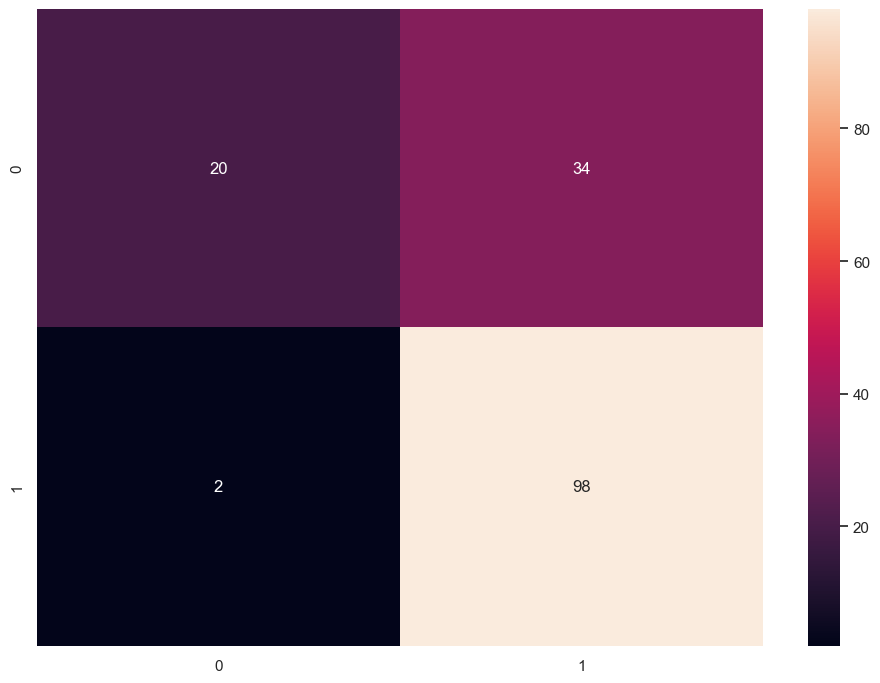

In [91]:
sns.heatmap(cm, annot=True)

#### The left side of the heatmap indicates actual values, and the bottom side shows predicted values.

#### For actual value '0' there are 26 correct predictions.
#### For actual value '1' there are 95 correct predictions.

#### The model has falsely predicted 30 counts for class 0.
#### Therefore, we need to train better for class 0.

#### Similarly, we can compose other additional assumptions from the confusion matrix.

In [88]:
with open('Loan prediction project.pkl','wb') as myfile:
    pickle.dump(model,myfile)